# Exploratory Data Analysis (EDA)
# Checking the Python Environment

This is to ensure that the correct Python environment is set up correctly and used

In [2]:
import sys
import IPython

# Change path to append here
sys.path.append(r'C:\Users\hp\Downloads\Machine Learning Assignment')

print("Python executable:", sys.executable)
print("Python version:", sys.version)
print("Kernel:", IPython.get_ipython().kernel)
print("Sys paths:", sys.path)

Python executable: C:\Users\hp\anaconda3\envs\machine_learning_assignment\python.exe
Python version: 3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]
Kernel: <ipykernel.ipkernel.IPythonKernel object at 0x00000195D6435010>
Sys paths: ['C:\\Users\\hp\\Downloads\\Machine_Learning_Assignment\\testing', 'C:\\Users\\hp\\Downloads\\Machine_Learning_Assignment', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\python311.zip', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\DLLs', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\Lib', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment', '', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\Lib\\site-packages', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\Lib\\site-packages\\win32', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learn

# Importing Libraries

This is to ensure that the necessary libraries are imported and used

In [9]:
# For DataFrame
import pandas as pd
import numpy as np

# For visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# For t-SNE
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Loading the Dataset

Following shows the raw dataset that is loaded into the notebook

In [4]:
df = pd.read_csv(r'../raw_data/customer_preprocessed_imputed_knn_n3_outlier_retained.csv')

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) will be conducted to understand the dataset better. The EDA in this project will include univariate, bivariate and multivariate analysis.

## 0.0 Grasping Initial Understanding of the Dataset

The correlation matrix is plotted, which shows the correlation between numerical features in the dataset.

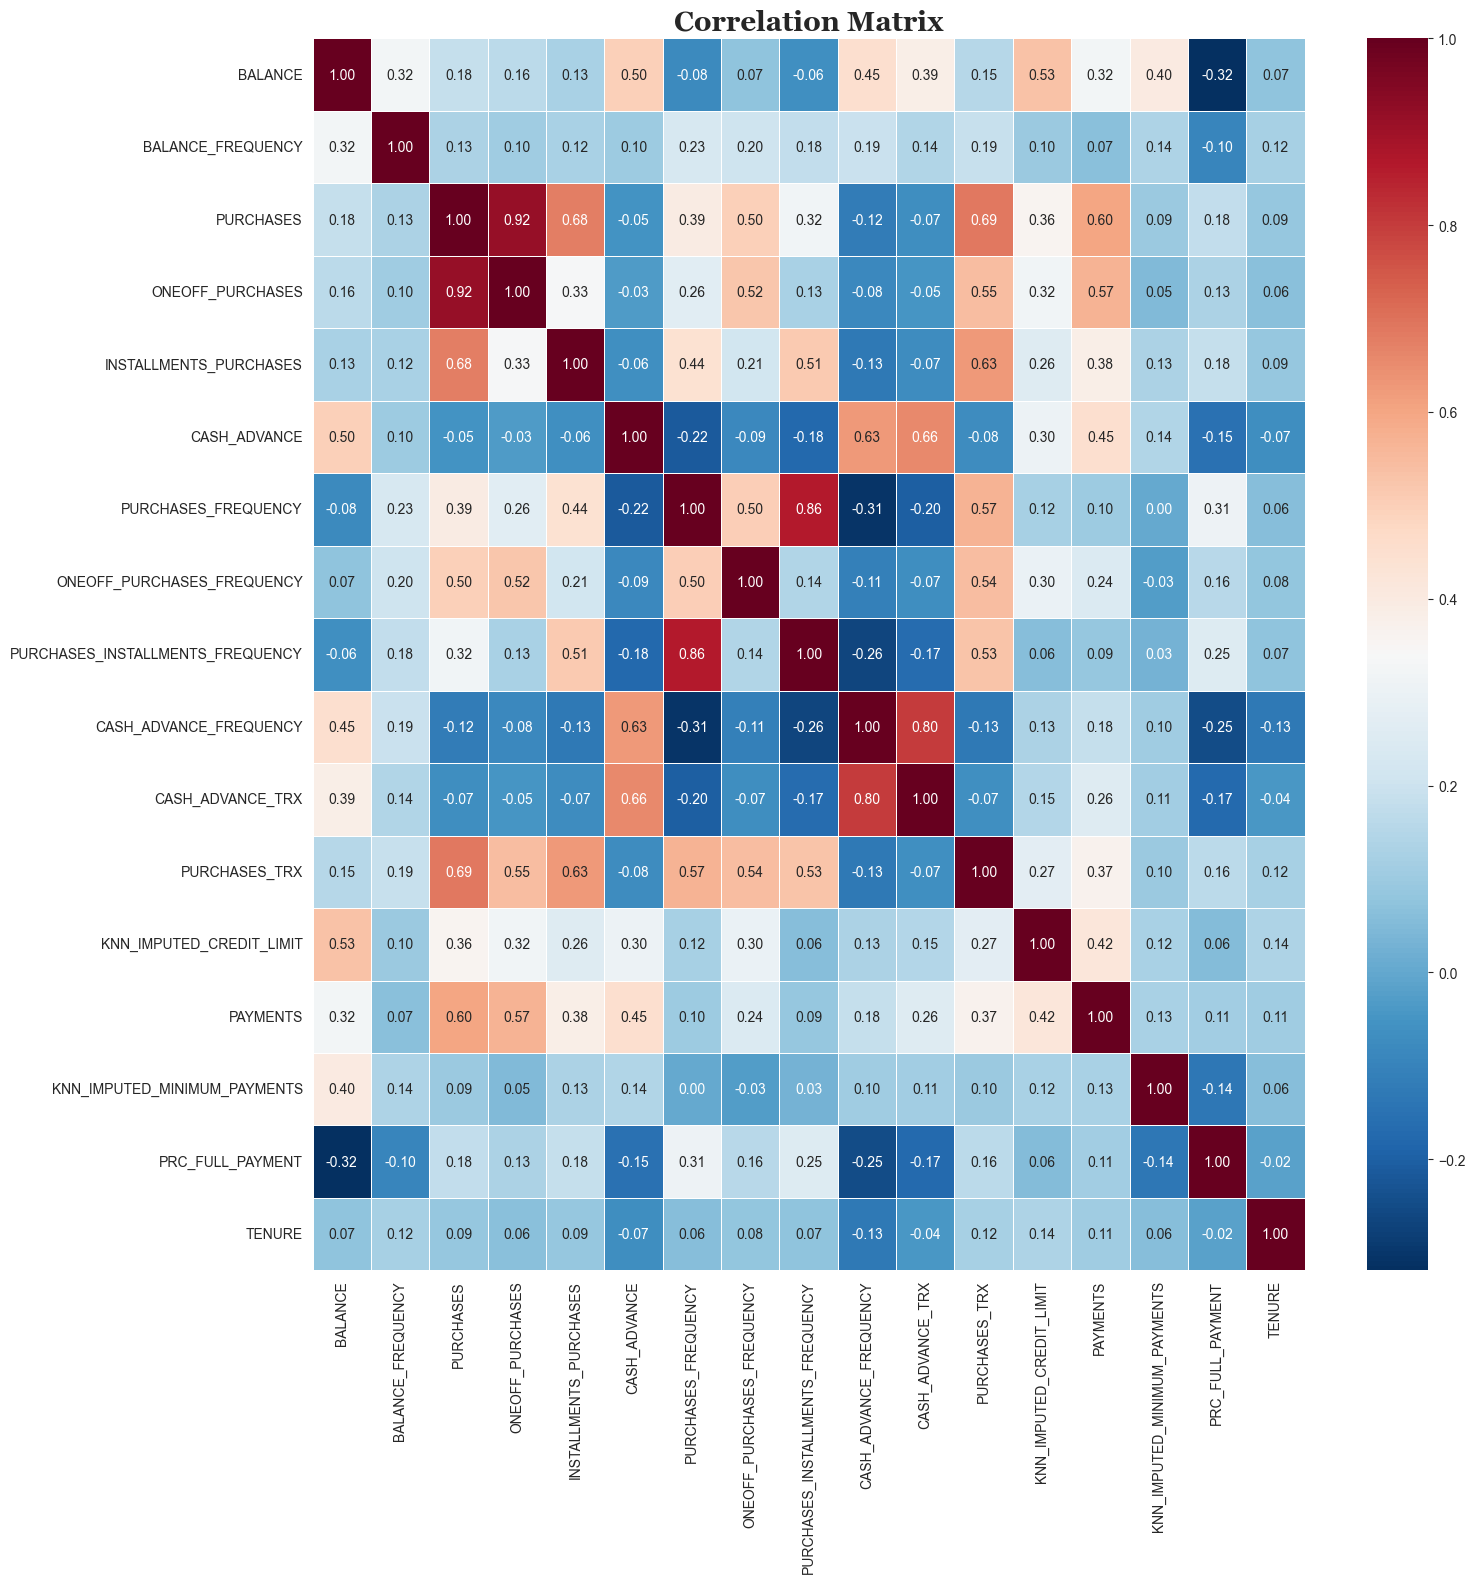

In [14]:
# Defining categorical and numerical columns
categorical_cols = ['TENURE']
numerical_cols = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
                  'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
                  'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                  'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
                  'KNN_IMPUTED_CREDIT_LIMIT', 'PAYMENTS', 'KNN_IMPUTED_MINIMUM_PAYMENTS',
                  'PRC_FULL_PAYMENT', 'TENURE']

# Setting layout of the plot
plt.figure(figsize = (16, 16))
plt.title('Correlation Matrix', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})

# Plotting the heatmap
sns.heatmap(df[numerical_cols].corr(), annot = True, cmap = sns.color_palette('RdBu_r', as_cmap = True), fmt = '.2f', linewidth = .7)

# Showing the plot
plt.show()

## 1.0 Univariate EDA
For univariate EDA, the distribution plots will be plotted for each numerical feature in the dataset whereas the count plots will be plotted for each categorical feature in the dataset. All features in the dataset are numerical except for 'TENURE', which is a categorical feature.

### 1.1 BALANCE
The distribution plot for 'BALANCE' shows a right-skewed distribution with a mean of 1564.47, median of 873.39 and mode of 0.00.

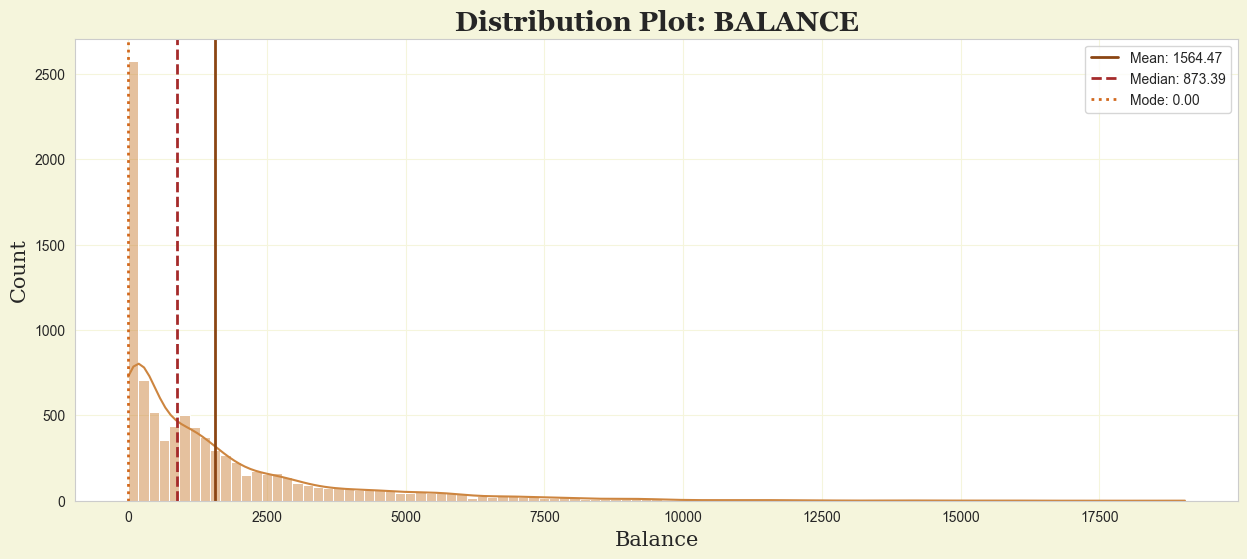

In [45]:
# Getting BALANCE data and its mean, median and mode
balance = df['BALANCE']
mean_balance = df['BALANCE'].mean()
median_balance = df['BALANCE'].median()
mode_balance = df['BALANCE'].mode()[0]

# Setting layout of the plot
plt.figure(figsize = (15, 6), facecolor = 'beige')
plt.grid(visible = True, color = 'beige') 
plt.title('Distribution Plot: BALANCE', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})
plt.xlabel('Balance', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})

# Plotting the histogram, with KDE and mean, mode, median lines
sns.histplot(balance, kde = True, stat = 'count', color = 'peru')
plt.axvline(mean_balance, color = 'saddlebrown', linestyle = '-', linewidth = 2, label = f'Mean: {mean_balance:.2f}')
plt.axvline(median_balance, color = 'brown', linestyle = '--', linewidth = 2, label = f'Median: {median_balance:.2f}')
plt.axvline(mode_balance, color = 'chocolate', linestyle = ':', linewidth = 2, label = f'Mode: {mode_balance:.2f}')

# Showing the plot
plt.legend()
plt.show()

### 1.2 BALANCE_FREQUENCY
The distribution plot for 'BALANCE_FREQUENCY' shows a left-skewed distribution with a mean of 0.88, median of 1.00 and mode of 1.00.

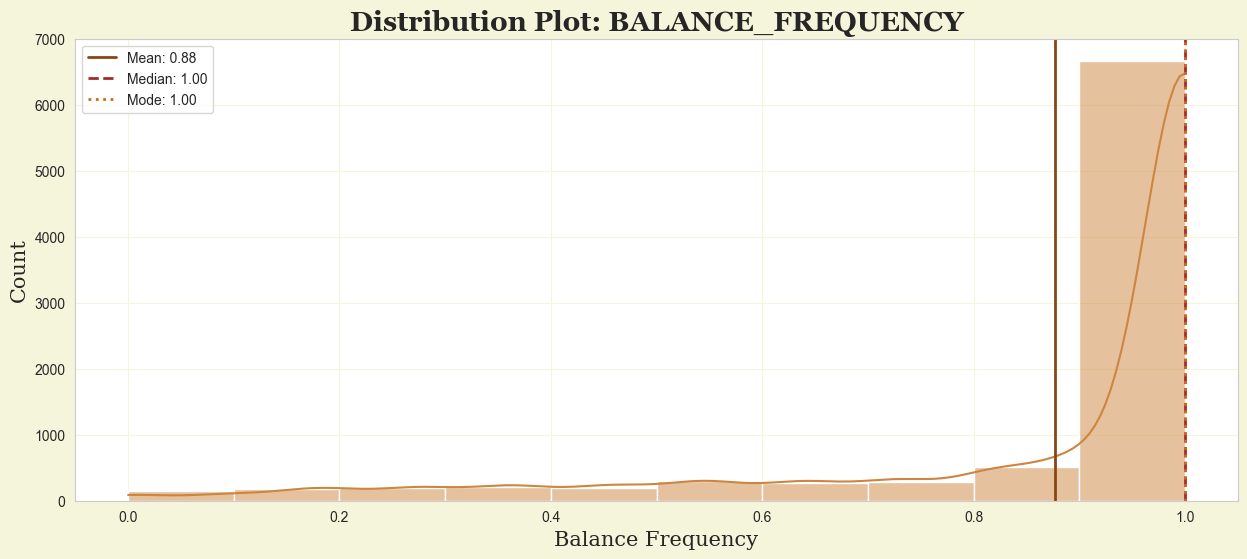

In [46]:
# Getting BALANCE_FREQUENCY data with its mean, median, mode
balance_freq = df['BALANCE_FREQUENCY']
mean_balance_freq = df['BALANCE_FREQUENCY'].mean()
median_balance_freq = df['BALANCE_FREQUENCY'].median()
mode_balance_freq = df['BALANCE_FREQUENCY'].mode()[0]

# Setting layout of the plot
plt.figure(figsize = (15, 6), facecolor = 'beige')
plt.grid(visible = True, color ='beige')
plt.title('Distribution Plot: BALANCE_FREQUENCY', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})
plt.xlabel('Balance Frequency', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})

# Plotting the histogram, with KDE and mean, mode, median lines
sns.histplot(balance_freq, kde = True, stat = 'count', color = 'peru', binwidth = 0.1) # Setting binwidth for better visualisation
plt.axvline(mean_balance_freq, color = 'saddlebrown', linestyle='-', linewidth = 2, label = f'Mean: {mean_balance_freq:.2f}')
plt.axvline(median_balance_freq, color = 'brown', linestyle = '--', linewidth = 2, label = f'Median: {median_balance_freq:.2f}')
plt.axvline(mode_balance_freq, color = 'chocolate', linestyle=':', linewidth = 2, label = f'Mode: {mode_balance_freq:.2f}')

# Showing the plot
plt.legend()
plt.show()

### 1.3 PURCHASES

The distribution plot for 'PURCHASES' shows a right-skewed distribution with a mean of 1003.20, median of 361.28 and mode of 0.00.

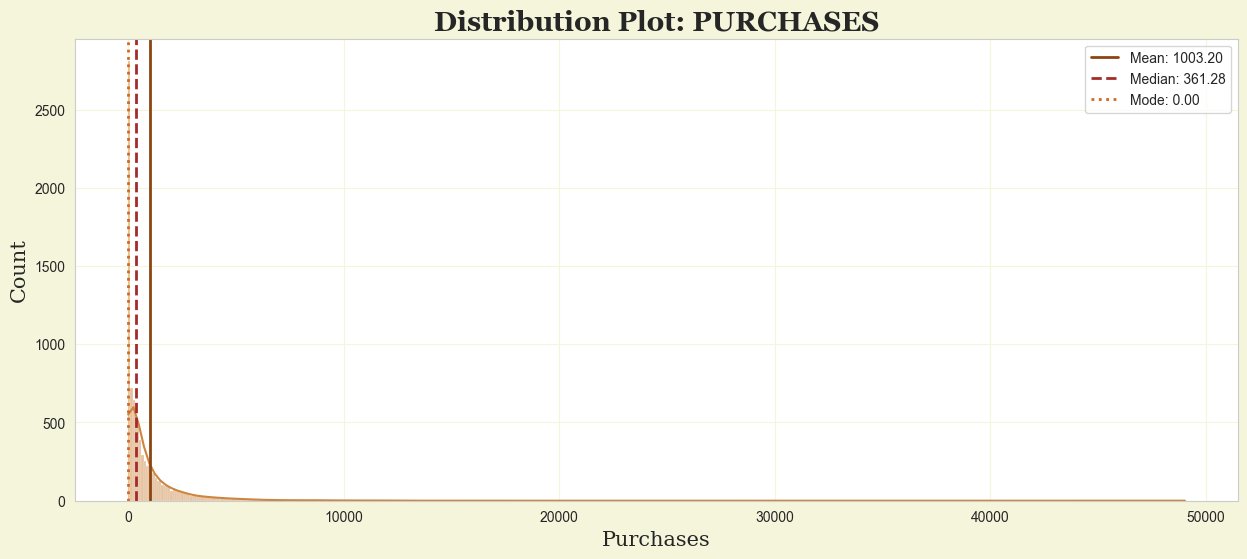

In [47]:
# Getting BALANCE_FREQUENCY data with its mean, median, mode
purchases = df['PURCHASES']
mean_purchases = df['PURCHASES'].mean()
median_purchases = df['PURCHASES'].median()
mode_purchases = df['PURCHASES'].mode()[0]

# Setting layout of the plot
plt.figure(figsize=(15, 6), facecolor='beige')
plt.grid(visible = True, color = 'beige')
plt.title('Distribution Plot: PURCHASES', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})
plt.xlabel('Purchases', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})

# Plotting the histogram, with KDE and mean, mode, median lines
sns.histplot(purchases, kde = True, stat = 'count', color = 'peru')
plt.axvline(mean_purchases, color = 'saddlebrown', linestyle = '-', linewidth = 2, label = f'Mean: {mean_purchases:.2f}')
plt.axvline(median_purchases, color = 'brown', linestyle = '--', linewidth = 2, label = f'Median: {median_purchases:.2f}')
plt.axvline(mode_purchases, color = 'chocolate', linestyle = ':', linewidth = 2, label = f'Mode: {mode_purchases:.2f}')

# Showing the plot
plt.legend()
plt.show()

### 1.4 ONEOFF_PURCHASES

The distribution plot for 'ONEOFF_PURCHASES' shows a right-skewed distribution with a mean of 592.44, median of 38.00 and mode of 0.00.

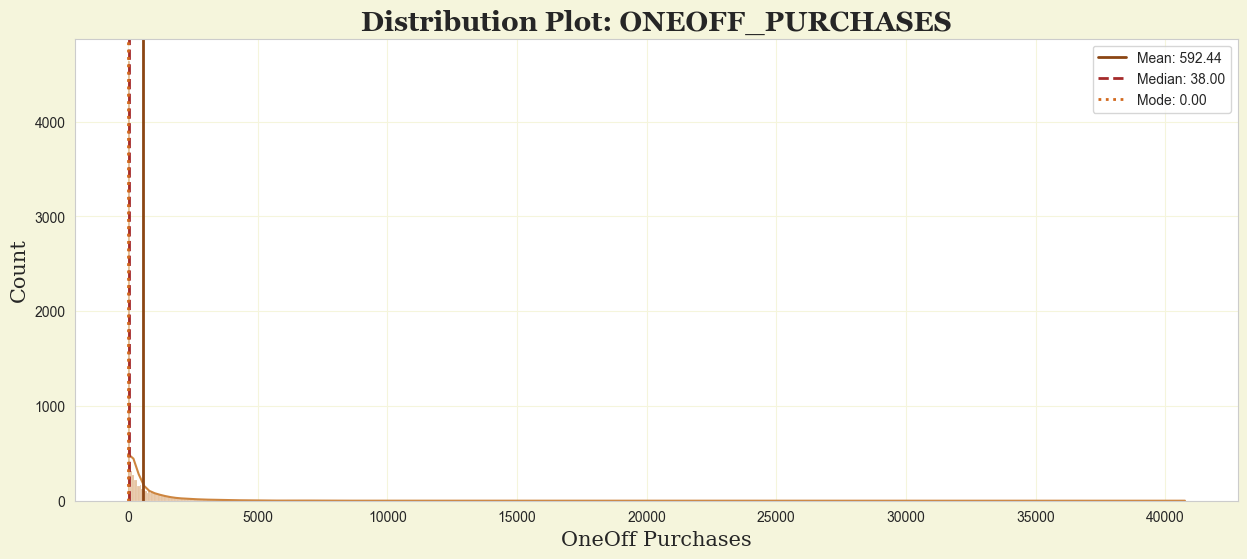

In [48]:
# Getting ONEOFF_PURCHASES data with its mean, median, mode
oneoff_purchases = df['ONEOFF_PURCHASES']
mean_oneoff_purchases = df['ONEOFF_PURCHASES'].mean()
median_oneoff_purchases = df['ONEOFF_PURCHASES'].median()
mode_oneoff_purchases = df['ONEOFF_PURCHASES'].mode()[0]

# Setting layout of the plot
plt.figure(figsize = (15, 6), facecolor = 'beige')
plt.grid(visible = True, color = 'beige')
plt.title('Distribution Plot: ONEOFF_PURCHASES', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})
plt.xlabel('OneOff Purchases', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})

# Plotting the histogram, with KDE and mean, mode, median lines
sns.histplot(oneoff_purchases, kde = True, stat = 'count', color = 'peru')
plt.axvline(mean_oneoff_purchases, color = 'saddlebrown', linestyle = '-', linewidth = 2, label = f'Mean: {mean_oneoff_purchases:.2f}')
plt.axvline(median_oneoff_purchases, color = 'brown', linestyle = '--', linewidth = 2, label = f'Median: {median_oneoff_purchases:.2f}')
plt.axvline(mode_oneoff_purchases, color = 'chocolate', linestyle = ':', linewidth = 2, label = f'Mode: {mode_oneoff_purchases:.2f}')

# Showing the plot
plt.legend()
plt.show()

### 1.5 INSTALLMENTS_PURCHASES

The distribution plot for 'INSTALLMENTS_PURCHASES' shows a right-skewed distribution with a mean of 411.07, median of 89.00 and mode of 0.00.

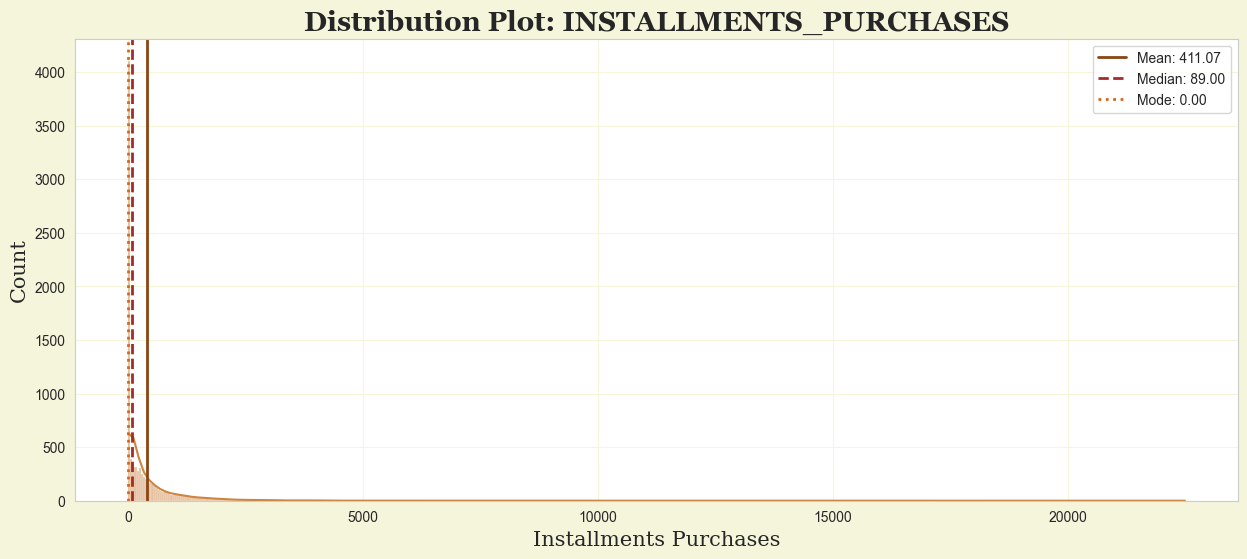

In [49]:
# Getting INSTALLMENTS_PURCHASES data with its mean, median, mode
installments_purchases = df['INSTALLMENTS_PURCHASES']
mean_installments_purchases = df['INSTALLMENTS_PURCHASES'].mean()
median_installments_purchases = df['INSTALLMENTS_PURCHASES'].median()
mode_installments_purchases = df['INSTALLMENTS_PURCHASES'].mode()[0]

# Setting layout of the plot
plt.figure(figsize = (15, 6), facecolor = 'beige')
plt.grid(visible = True, color = 'beige')
plt.title('Distribution Plot: INSTALLMENTS_PURCHASES', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})
plt.xlabel('Installments Purchases', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})

# Plotting the histogram, with KDE and mean, mode, median lines
sns.histplot(installments_purchases, kde = True, stat = 'count', color = 'peru')
plt.axvline(mean_installments_purchases, color = 'saddlebrown', linestyle = '-', linewidth = 2, label = f'Mean: {mean_installments_purchases:.2f}')
plt.axvline(median_installments_purchases, color = 'brown', linestyle = '--', linewidth = 2, label = f'Median: {median_installments_purchases:.2f}')
plt.axvline(mode_installments_purchases, color = 'chocolate', linestyle = ':', linewidth = 2, label = f'Mode: {mode_installments_purchases:.2f}')

# Plotting the histogram, with KDE and mean, mode, median lines
plt.legend()
plt.show()

### 1.6 CASH_ADVANCE

The distribution plot for 'CASH_ADVANCE' shows a right-skewed distribution with a mean of 978.87, median of 0.00 and mode of 0.00.

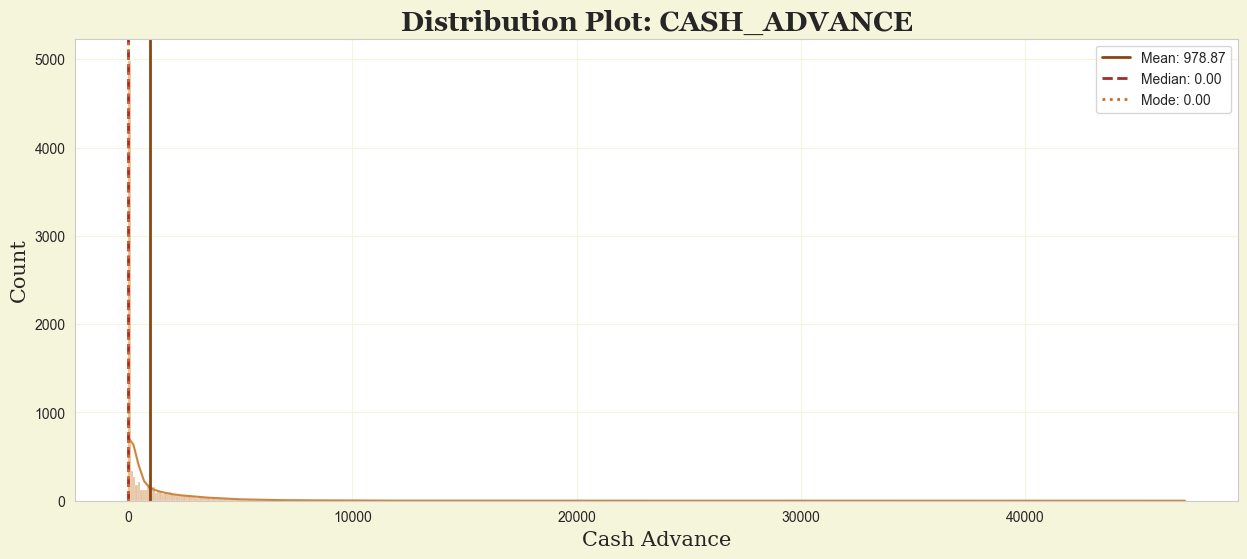

In [50]:
# Getting CASH_ADVANCE data with its mean, median, mode
cash_advance = df['CASH_ADVANCE']
mean_cash_advance = df['CASH_ADVANCE'].mean()
mode_cash_advance = df['CASH_ADVANCE'].mode()[0]
median_cash_advance = df['CASH_ADVANCE'].median()

# Setting layout of the plot
plt.figure(figsize = (15, 6), facecolor= 'beige')
plt.grid(visible = True, color = 'beige')
plt.title('Distribution Plot: CASH_ADVANCE', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})
plt.xlabel('Cash Advance', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})

# Plotting the histogram, with KDE and mean, mode, median lines
sns.histplot(cash_advance, kde = True, stat = 'count', color = 'peru')
plt.axvline(mean_cash_advance, color = 'saddlebrown', linestyle = '-', linewidth = 2, label = f'Mean: {mean_cash_advance:.2f}')
plt.axvline(median_cash_advance, color = 'brown', linestyle = '--', linewidth = 2, label = f'Median: {median_cash_advance:.2f}')
plt.axvline(mode_cash_advance, color = 'chocolate', linestyle = ':', linewidth = 2, label = f'Mode: {mode_cash_advance:.2f}')

# Showing the plot
plt.legend()
plt.show()

### 1.7 PURCHASES_FREQUENCY

The distribution plot for 'PURCHASES_FREQUENCY' shows a distribution with a mean of 0.49, median of 0.50 and mode of 1.00.

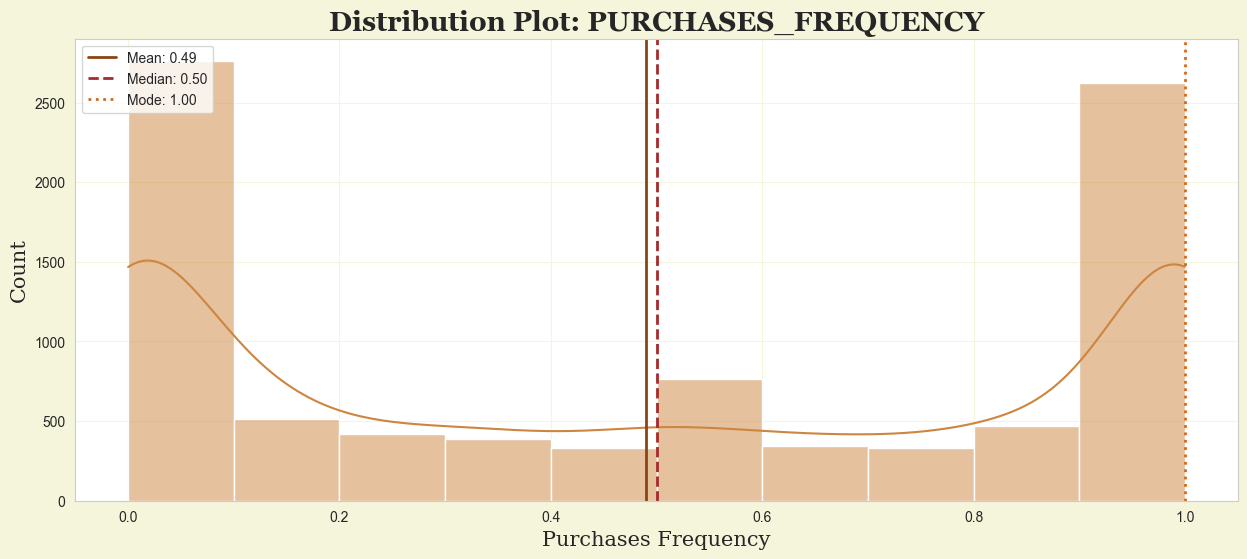

In [51]:
# Getting PURCHASES_FREQUENCY data with its mean, median, mode
purchases_freq = df['PURCHASES_FREQUENCY']
mean_purchases_freq = df['PURCHASES_FREQUENCY'].mean()
median_purchases_freq = df['PURCHASES_FREQUENCY'].median()
mode_purchases_freq = df['PURCHASES_FREQUENCY'].mode()[0]

# Setting layout of the plot
plt.figure(figsize = (15, 6), facecolor = 'beige')
plt.grid(visible = True, color = 'beige')
plt.title('Distribution Plot: PURCHASES_FREQUENCY', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})
plt.xlabel('Purchases Frequency', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})

# Plotting the histogram, with KDE and mean, mode, median lines
sns.histplot(purchases_freq, kde = True, stat = 'count', color = 'peru', binwidth = 0.1) # Setting binwidth for better visualisation
plt.axvline(mean_purchases_freq, color = 'saddlebrown', linestyle = '-', linewidth = 2, label = f'Mean: {mean_purchases_freq:.2f}')
plt.axvline(median_purchases_freq, color = 'brown', linestyle = '--', linewidth = 2, label = f'Median: {median_purchases_freq:.2f}')
plt.axvline(mode_purchases_freq, color = 'chocolate', linestyle = ':', linewidth = 2, label = f'Mode: {mode_purchases_freq:.2f}')

# Showing the plot
plt.legend()
plt.show()

### 1.8 ONEOFF_PURCHASES_FREQUENCY

The distribution plot for 'ONEOFF_PURCHASES_FREQUENCY' shows a right-skewed distribution with a mean of 0.20, median of 0.08 and mode of 0.00.

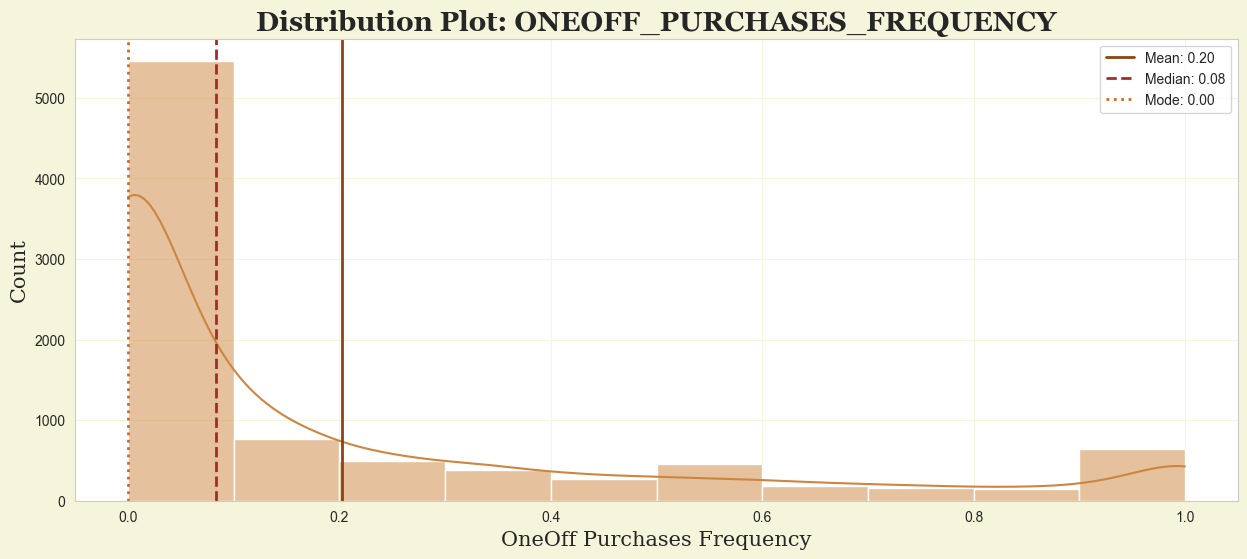

In [52]:
# Getting ONEOFF_PURCHASES_FREQUENCY data with its mean, median, mode
oneoff_purchases_freq = df['ONEOFF_PURCHASES_FREQUENCY']
mean_oneoff_purchases_freq = df['ONEOFF_PURCHASES_FREQUENCY'].mean()
median_oneoff_purchases_freq = df['ONEOFF_PURCHASES_FREQUENCY'].median()
mode_oneoff_purchases_freq = df['ONEOFF_PURCHASES_FREQUENCY'].mode()[0]

# Setting layout of the plot
plt.figure(figsize = (15, 6), facecolor = 'beige')
plt.grid(visible = True, color = 'beige')
plt.title('Distribution Plot: ONEOFF_PURCHASES_FREQUENCY', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})
plt.xlabel('OneOff Purchases Frequency', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})

# Plotting the histogram, with KDE and mean, mode, median lines
sns.histplot(oneoff_purchases_freq, kde = True, stat = 'count', color = 'peru', binwidth = 0.1) # Setting binwidth for better visualisation
plt.axvline(mean_oneoff_purchases_freq, color = 'saddlebrown', linestyle = '-', linewidth = 2, label = f'Mean: {mean_oneoff_purchases_freq:.2f}')
plt.axvline(median_oneoff_purchases_freq, color = 'brown', linestyle = '--', linewidth = 2, label = f'Median: {median_oneoff_purchases_freq:.2f}')
plt.axvline(mode_oneoff_purchases_freq, color = 'chocolate', linestyle = ':', linewidth = 2, label = f'Mode: {mode_oneoff_purchases_freq:.2f}')

# Showing the plot
plt.legend()
plt.show()

### 1.9 PURCHASES_INSTALLMENTS_FREQUENCY

The distribution plot for 'PURCHASES_INSTALLMENTS_FREQUENCY' shows a distribution with a mean of 0.36, median of 0.17 and mode of 0.00.

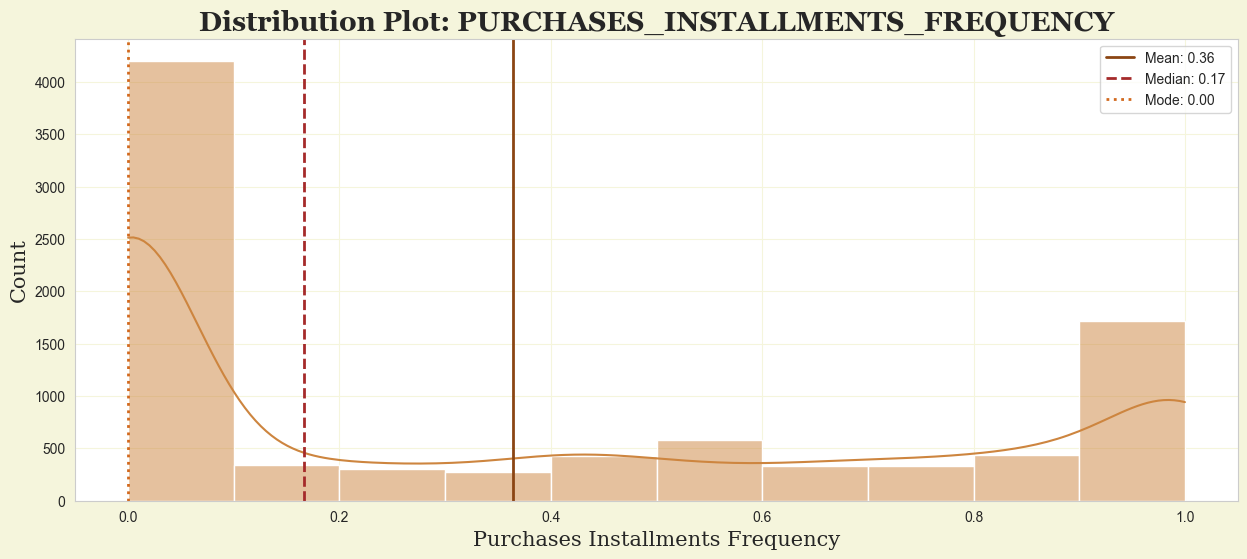

In [53]:
# Getting PURCHASES_INSTALLMENTS_FREQUENCY data with its mean, median, mode
purchases_installments_freq = df['PURCHASES_INSTALLMENTS_FREQUENCY']
mean_purchases_installments_freq = df['PURCHASES_INSTALLMENTS_FREQUENCY'].mean()
median_purchases_installments_freq = df['PURCHASES_INSTALLMENTS_FREQUENCY'].median()
mode_purchases_installments_freq = df['PURCHASES_INSTALLMENTS_FREQUENCY'].mode()[0]

# Setting layout of the plot
plt.figure(figsize = (15, 6), facecolor = 'beige')
plt.grid(visible = True, color = 'beige')
plt.title('Distribution Plot: PURCHASES_INSTALLMENTS_FREQUENCY', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})
plt.xlabel('Purchases Installments Frequency', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})

# Plotting the histogram, with KDE and mean, mode, median lines
sns.histplot(purchases_installments_freq, kde = True, stat = 'count', color = 'peru', binwidth = 0.1) #Setting binwidth for better visualisation
plt.axvline(mean_purchases_installments_freq, color = 'saddlebrown', linestyle = '-', linewidth = 2, label = f'Mean: {mean_purchases_installments_freq:.2f}')
plt.axvline(median_purchases_installments_freq, color = 'brown', linestyle = '--', linewidth = 2, label = f'Median: {median_purchases_installments_freq:.2f}')
plt.axvline(mode_purchases_installments_freq, color = 'chocolate', linestyle = ':', linewidth = 2, label = f'Mode: {mode_purchases_installments_freq:.2f}')

# Showing the plot
plt.legend()
plt.show()

### 1.10 CASH_ADVANCE_FREQUENCY

The distribution plot for 'CASH_ADVANCE_FREQUENCY' shows a right-skewed distribution with a mean of 0.14, median of 0.00 and mode of 0.00.

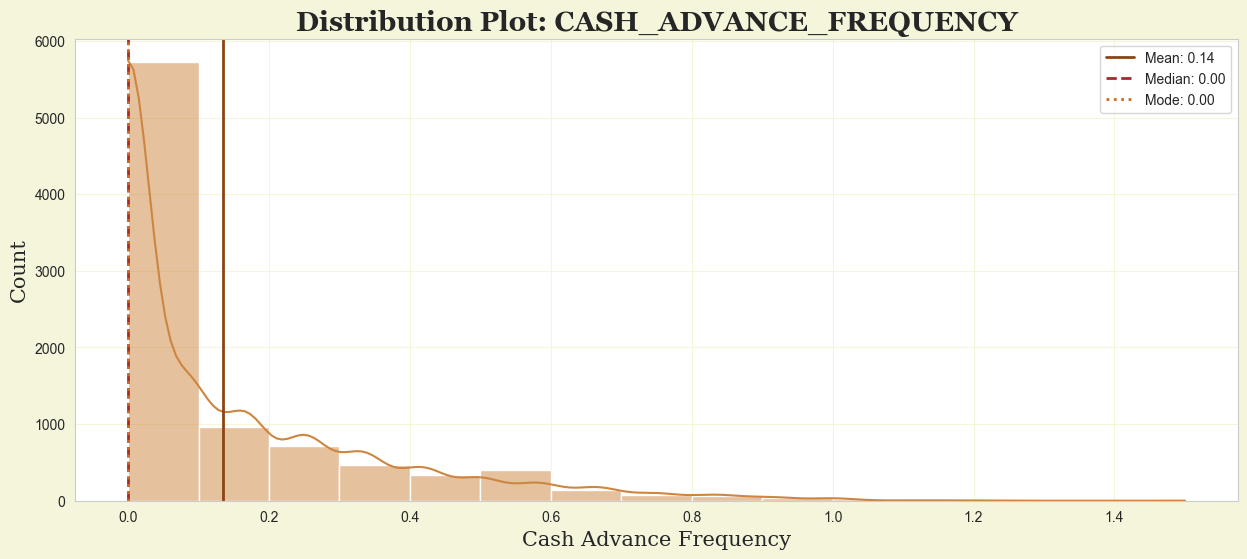

In [54]:
# Getting CASH_ADVANCE_FREQUENCY data with its mean, median, mode
cash_advance_freq = df['CASH_ADVANCE_FREQUENCY']
mean_cash_advance_freq = df['CASH_ADVANCE_FREQUENCY'].mean()
median_cash_advance_freq = df['CASH_ADVANCE_FREQUENCY'].median()
mode_cash_advance_freq = df['CASH_ADVANCE_FREQUENCY'].mode()[0]

# Setting layout of the plot
plt.figure(figsize = (15, 6), facecolor = 'beige')
plt.grid(visible = True, color = 'beige')
plt.title('Distribution Plot: CASH_ADVANCE_FREQUENCY', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})
plt.xlabel('Cash Advance Frequency', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})

# Plotting the histogram, with KDE and mean, mode, median lines
sns.histplot(cash_advance_freq, kde = True, stat = 'count', color = 'peru', binwidth = 0.1)
plt.axvline(mean_cash_advance_freq, color = 'saddlebrown', linestyle = '-', linewidth = 2, label = f'Mean: {mean_cash_advance_freq:.2f}')
plt.axvline(median_cash_advance_freq, color = 'brown', linestyle = '--', linewidth = 2, label = f'Median: {median_cash_advance_freq:.2f}')
plt.axvline(mode_cash_advance_freq, color = 'chocolate', linestyle = ':', linewidth = 2, label = f'Mode: {mode_cash_advance_freq:.2f}')

# Showing the plot
plt.legend()
plt.show()

### 1.11 CASH_ADVANCE_TRX

The distribution plot for 'CASH_ADVANCE_TRX' shows a right-skewed distribution with a mean of 3.25, median of 0.00 and mode of 0.00.

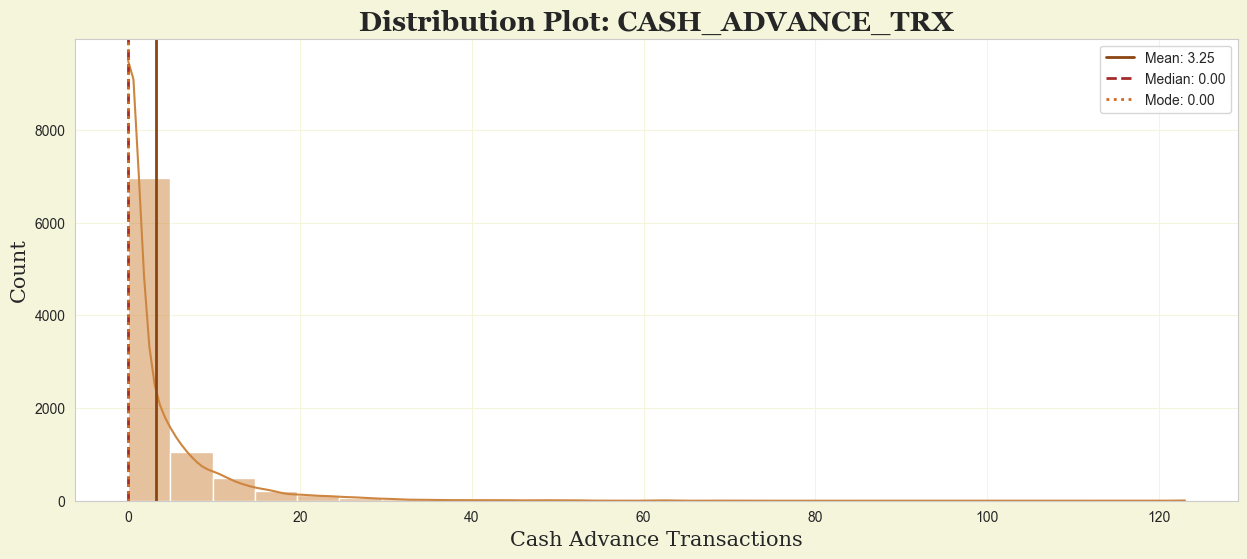

In [55]:
# Getting CASH_ADVANCE_TRX data with its mean, median, mode
cash_advance_trx = df['CASH_ADVANCE_TRX']
mean_cash_advance_trx = df['CASH_ADVANCE_TRX'].mean()
median_cash_advance_trx = df['CASH_ADVANCE_TRX'].median()
mode_cash_advance_trx = df['CASH_ADVANCE_TRX'].mode()[0]

# Setting layout of the plot
plt.figure(figsize = (15, 6), facecolor = 'beige')
plt.grid(visible = True, color = 'beige')
plt.title('Distribution Plot: CASH_ADVANCE_TRX', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})
plt.xlabel('Cash Advance Transactions', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})

# Plotting the histogram, with KDE and mean, mode, median lines
sns.histplot(cash_advance_trx, kde = True, stat = 'count', color = 'peru', binwidth = 5) # Setting binwidth for better visualisation
plt.axvline(mean_cash_advance_trx, color = 'saddlebrown', linestyle = '-', linewidth = 2, label = f'Mean: {mean_cash_advance_trx:.2f}')
plt.axvline(median_cash_advance_trx, color = 'brown', linestyle = '--', linewidth = 2, label = f'Median: {median_cash_advance_trx:.2f}')
plt.axvline(mode_cash_advance_trx, color = 'chocolate', linestyle = ':', linewidth = 2, label = f'Mode: {mode_cash_advance_trx:.2f}')

# Showing the plot
plt.legend()
plt.show()

### 1.12 PURCHASES_TRX

The distribution plot for 'PURCHASES_TRX' shows a right-skewed distribution with a mean of 14.71, median of 7.00 and mode of 0.00.

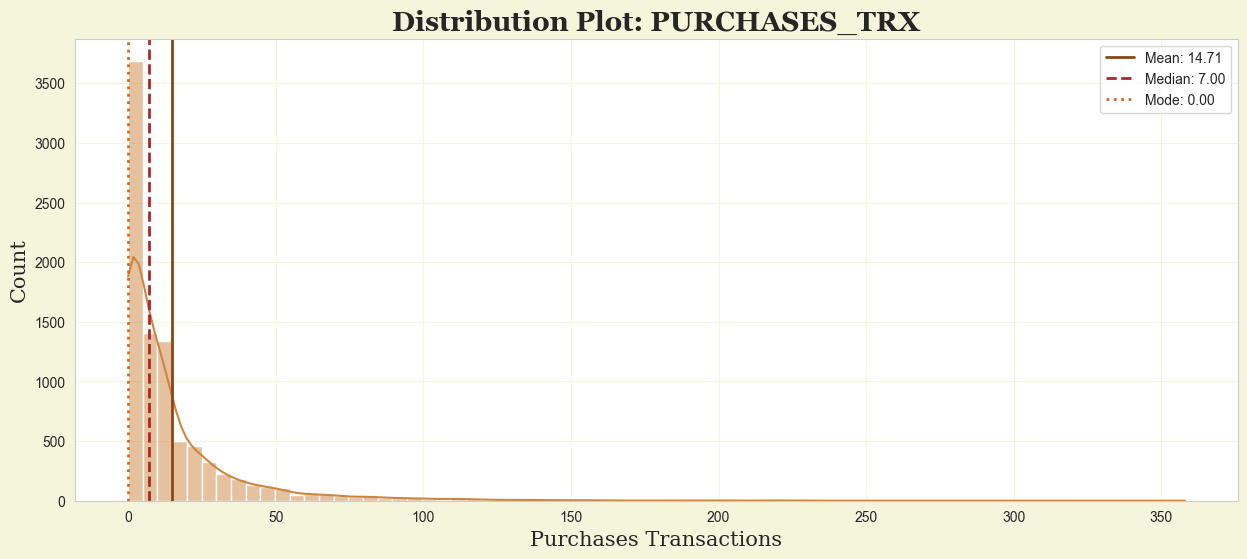

In [56]:
# Getting PURCHASES_TRX data with its mean, median, mode
purchases_trx = df['PURCHASES_TRX']
mean_purchases_trx = df['PURCHASES_TRX'].mean()
median_purchases_trx = df['PURCHASES_TRX'].median()
mode_purchases_trx = df['PURCHASES_TRX'].mode()[0]

# Setting layout of the plot
plt.figure(figsize = (15, 6), facecolor = 'beige')
plt.grid(visible = True, color = 'beige')
plt.title('Distribution Plot: PURCHASES_TRX', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})
plt.xlabel('Purchases Transactions', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})

# Plotting the histogram, with KDE and mean, mode, median lines
sns.histplot(purchases_trx, kde = True, stat = 'count', color = 'peru', binwidth = 5) # 
plt.axvline(mean_purchases_trx, color = 'saddlebrown', linestyle = '-', linewidth=2, label = f'Mean: {mean_purchases_trx:.2f}')
plt.axvline(median_purchases_trx, color = 'brown', linestyle = '--', linewidth = 2, label = f'Median: {median_purchases_trx:.2f}')
plt.axvline(mode_purchases_trx, color = 'chocolate', linestyle = ':', linewidth = 2, label = f'Mode: {mode_purchases_trx:.2f}')

# Showing the plot
plt.legend()
plt.show()

### 1.13 CREDIT_LIMIT

The distribution plot for 'CREDIT_LIMIT' shows a distribution with a mean of 4494.18, median of 3000.00 and mode of 3000.00.

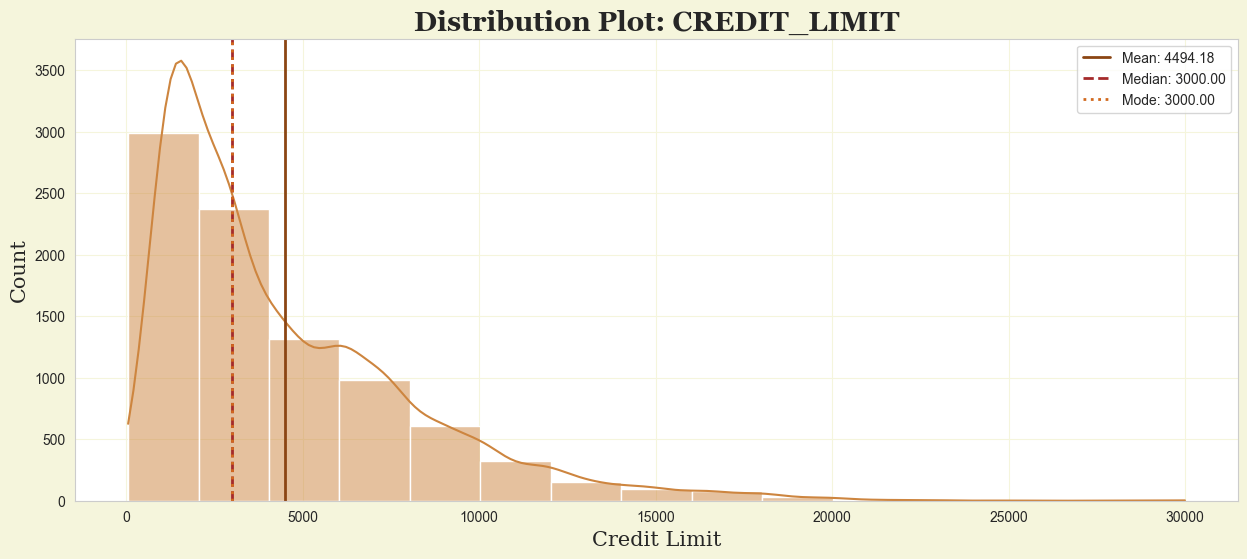

In [57]:
# Getting CREDIT_LIMIT data with its mean, median, mode
credit_limit = df['KNN_IMPUTED_CREDIT_LIMIT']
mean_credit_limit = df['KNN_IMPUTED_CREDIT_LIMIT'].mean()
median_credit_limit = df['KNN_IMPUTED_CREDIT_LIMIT'].median()
mode_credit_limit = df['KNN_IMPUTED_CREDIT_LIMIT'].mode()[0]

# Setting layout of the plot
plt.figure(figsize = (15, 6), facecolor = 'beige')
plt.grid(visible = True, color = 'beige')
plt.title('Distribution Plot: CREDIT_LIMIT', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})
plt.xlabel('Credit Limit', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})

# Plotting the histogram, with KDE and mean, mode, median lines
sns.histplot(credit_limit, kde = True, stat = 'count', color = 'peru', binwidth = 2000) # Setting binwidth for better visualisation
plt.axvline(mean_credit_limit, color = 'saddlebrown', linestyle = '-', linewidth = 2, label = f'Mean: {mean_credit_limit:.2f}')
plt.axvline(median_credit_limit, color = 'brown', linestyle = '--', linewidth = 2, label = f'Median: {median_credit_limit:.2f}')
plt.axvline(mode_credit_limit, color = 'chocolate', linestyle = ':', linewidth = 2, label = f'Mode: {mode_credit_limit:.2f}')

# Showing the plot
plt.legend()
plt.show()

### 1.14 PAYMENTS

The distribution plot for 'PAYMENTS' shows a right-skewed distribution with a mean of 1733.14, median of 856.90 and mode of 0.00.

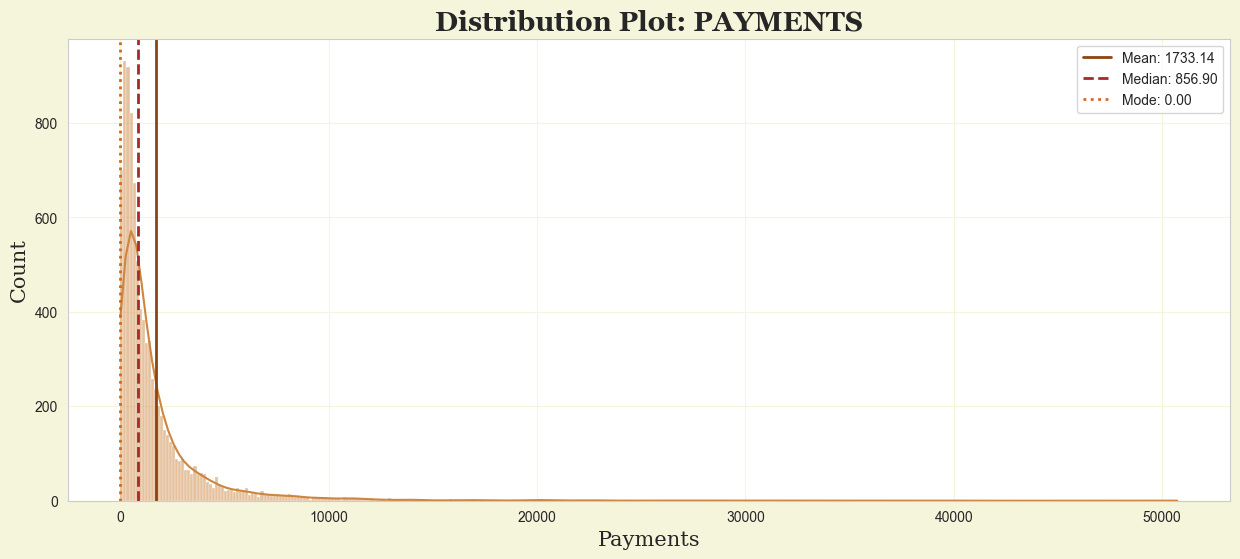

In [58]:
# Getting PAYMENTS data with its mean, median, mode
payments = df['PAYMENTS']
mean_payments = df['PAYMENTS'].mean()
median_payments = df['PAYMENTS'].median()
mode_payments = df['PAYMENTS'].mode()[0]

# Setting layout of the plot
plt.figure(figsize = (15, 6), facecolor = 'beige')
plt.grid(visible = True, color = 'beige')
plt.title('Distribution Plot: PAYMENTS', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})
plt.xlabel('Payments', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})

# Plotting the histogram, with KDE and mean, mode, median lines
sns.histplot(payments, kde = True, stat = 'count', color = 'peru')
plt.axvline(mean_payments, color = 'saddlebrown', linestyle = '-', linewidth = 2, label = f'Mean: {mean_payments:.2f}')
plt.axvline(median_payments, color = 'brown', linestyle = '--', linewidth = 2, label = f'Median: {median_payments:.2f}')
plt.axvline(mode_payments, color = 'chocolate', linestyle = ':', linewidth = 2, label = f'Mode: {mode_payments:.2f}')

# Showing the plot
plt.legend()
plt.show()

### 1.15 MINIMUM_PAYMENTS

The distribution plot for 'MINIMUM_PAYMENTS' shows a right-skewed distribution with a mean of 854.29, median of 300.49 and mode of 36.62.

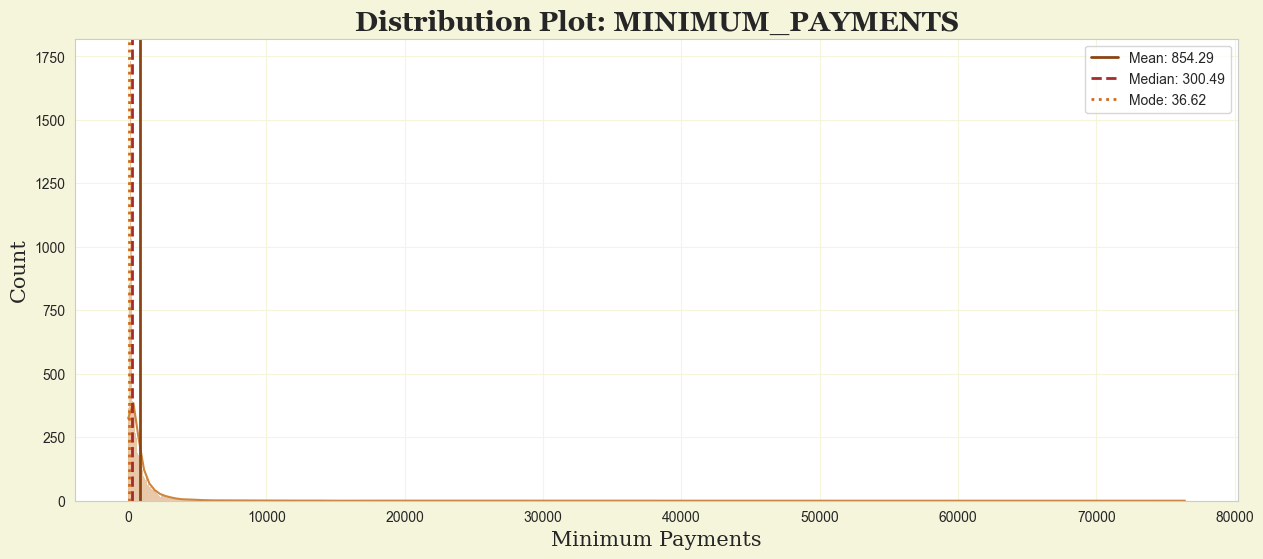

In [59]:
# Getting MINIMUM_PAYMENTS data with its mean, median, mode
min_payments = df['KNN_IMPUTED_MINIMUM_PAYMENTS']
mean_min_payments = df['KNN_IMPUTED_MINIMUM_PAYMENTS'].mean()
median_min_payments = df['KNN_IMPUTED_MINIMUM_PAYMENTS'].median()
mode_min_payments = df['KNN_IMPUTED_MINIMUM_PAYMENTS'].mode()[0]

# Setting layout of the plot
plt.figure(figsize = (15, 6), facecolor = 'beige')
plt.grid(visible = True, color = 'beige')
plt.title('Distribution Plot: MINIMUM_PAYMENTS', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})
plt.xlabel('Minimum Payments', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})

# Plotting the histogram, with KDE and mean, mode, median lines
sns.histplot(min_payments, kde = True, stat = 'count', color = 'peru')
plt.axvline(mean_min_payments, color = 'saddlebrown', linestyle = '-', linewidth = 2, label = f'Mean: {mean_min_payments:.2f}')
plt.axvline(median_min_payments, color = 'brown', linestyle = '--', linewidth = 2, label = f'Median: {median_min_payments:.2f}')
plt.axvline(mode_min_payments, color = 'chocolate', linestyle = ':', linewidth = 2, label = f'Mode: {mode_min_payments:.2f}')

# Showing the plot
plt.legend()
plt.show()

### 1.16 PRC_FULL_PAYMENT

The distribution plot for 'PRC_FULL_PAYMENT' shows a right-skewed distribution with a mean of 0.15, median of 0.00 and mode of 0.00.

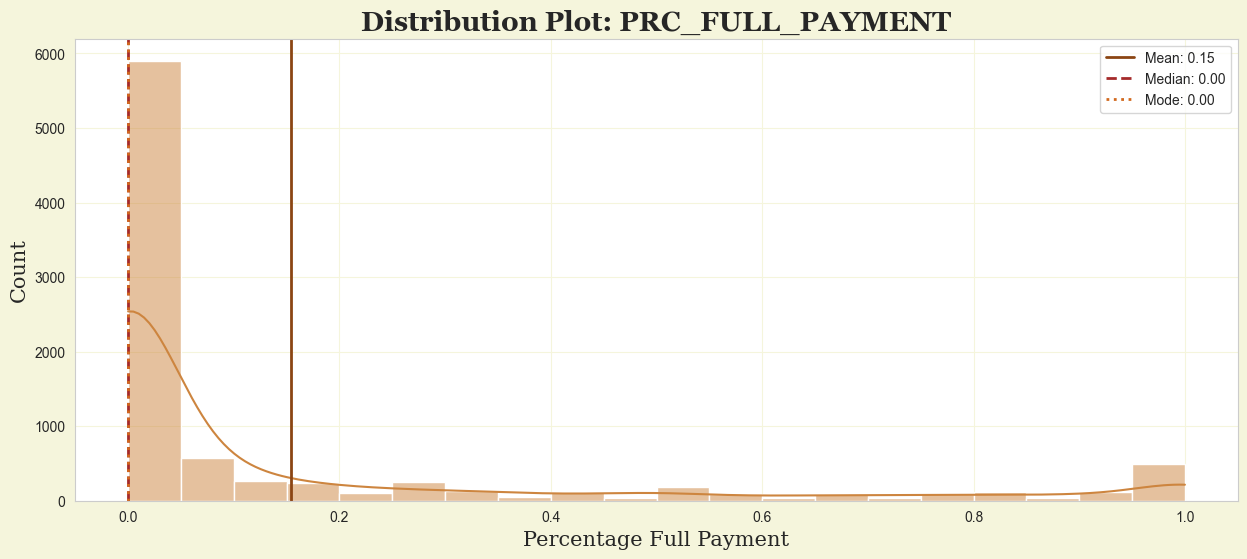

In [60]:
# Getting PRC_FULL_PAYMENT data with its mean, median, mode
prc_full_payment = df['PRC_FULL_PAYMENT']
mean_prc_full_payment = df['PRC_FULL_PAYMENT'].mean()
median_prc_full_payment = df['PRC_FULL_PAYMENT'].median()
mode_prc_full_payment = df['PRC_FULL_PAYMENT'].mode()[0]

# Setting layout of the plot
plt.figure(figsize = (15, 6), facecolor = 'beige')
plt.grid(visible = True, color = 'beige')
plt.title('Distribution Plot: PRC_FULL_PAYMENT', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})
plt.xlabel('Percentage Full Payment', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})

# Plotting the histogram, with KDE and mean, mode, median lines
sns.histplot(prc_full_payment, kde = True, stat = 'count', color = 'peru', binwidth = 0.05)
plt.axvline(mean_prc_full_payment, color = 'saddlebrown', linestyle = '-', linewidth = 2, label = f'Mean: {mean_prc_full_payment:.2f}')
plt.axvline(median_prc_full_payment, color = 'brown', linestyle = '--', linewidth = 2, label = f'Median: {median_prc_full_payment:.2f}')
plt.axvline(mode_prc_full_payment, color = 'chocolate', linestyle = ':', linewidth = 2, label = f'Mode: {mode_prc_full_payment:.2f}')

# Showing the plot
plt.legend()
plt.show()

#### 1.17 TENURE

The bar chart for 'TENURE' shows that most cardholders have a tenure of 12 months, followed by 11 months and 10 months, with respectively 84.74%, 4.08% and 2.64% of the total customers.

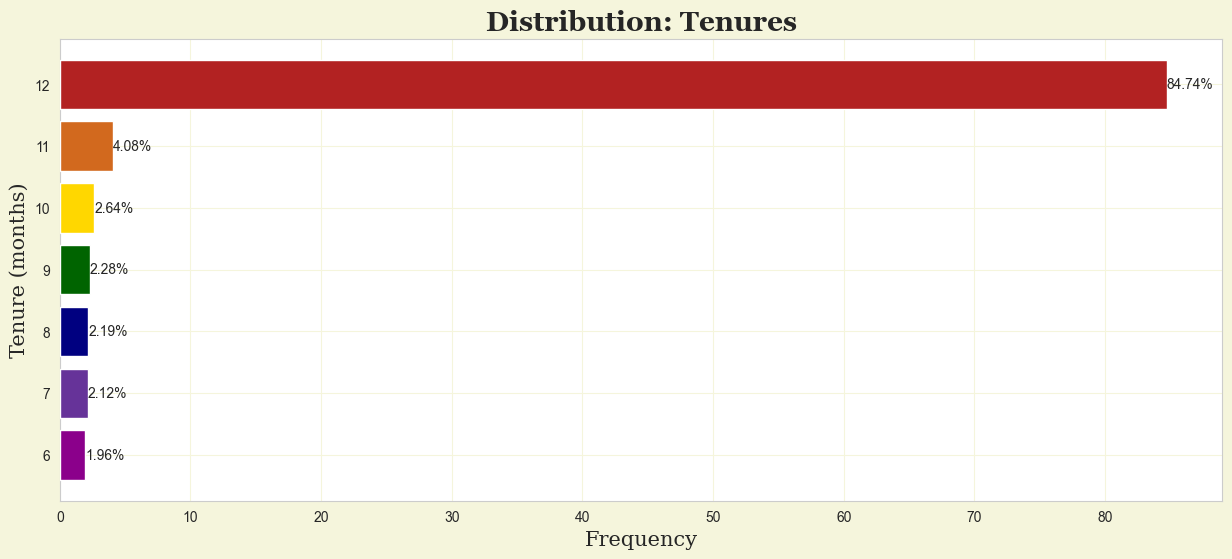

In [61]:
# Getting TENURE data with the respective counts
tenure_value_counts = df['TENURE'].value_counts().sort_values(ascending = False)
tenure_value_percents = [(row / sum(tenure_value_counts)) * 100 for row in tenure_value_counts]

# Setting layout of the plot
fig, ax = plt.subplots(figsize = (15, 6))
colours = ('firebrick', 'chocolate', 'gold', 'darkgreen', 'navy', 'rebeccapurple', 'darkmagenta')
fig.patch.set_facecolor('beige')
ax.grid(visible = True, color = 'beige', zorder=0)
ax.set_title('Distribution: Tenures', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})
ax.set_xlabel('Frequency', fontdict = {'family' : 'serif', 'size' : 15})
ax.set_ylabel('Tenure (months)', fontdict = {'family' : 'serif', 'size' : 15})

# Plotting the horizontal bar chart
bars = ax.barh(tenure_value_counts.index.sort_values(ascending = False), tenure_value_percents, color = colours, zorder = 3)
ax.bar_label(bars, fmt = '%.2f%%')

# Showing the plot
plt.show()

## 2.0 Bivariate EDA
For bivariate EDA, only some of the features will be considered in the following scatter plots

### 2.1 CREDIT LIMIT vs TENURE
The scatter plot for 'CREDIT LIMIT' vs 'TENURE' shows that different tenure have slightly different credit limits distribution.

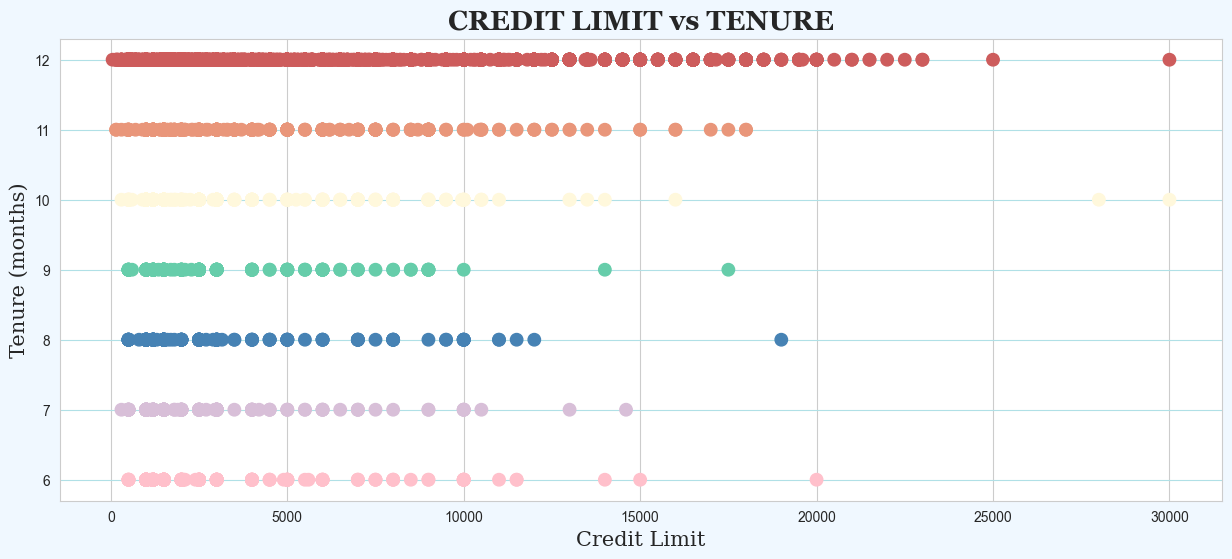

In [62]:
# Color mapping for different tenure values
color_map = {
    12: 'indianred',
    11: 'darksalmon',
    10: 'cornsilk',
    9: 'mediumaquamarine',
    8: 'steelblue',
    7: 'thistle'
}

# Constructing color list using list comprehension
colors = [color_map.get(value, 'pink') for value in df['TENURE']]

# Setting layout of the plot
plt.figure(figsize = (15, 6)).patch.set_facecolor('aliceblue')
plt.gca().grid(visible = True, color = 'powderblue', zorder = 1, axis = 'y')
plt.title('CREDIT LIMIT vs TENURE', fontdict = {'family': 'georgia', 'weight': 'bold', 'size': 20})
plt.xlabel('Credit Limit', fontdict = {'family': 'serif', 'size': 15})
plt.ylabel('Tenure (months)', fontdict = {'family': 'serif', 'size': 15})

# PLotting scatter plot
plt.scatter(df['KNN_IMPUTED_CREDIT_LIMIT'], df['TENURE'], c = colors, zorder = 3, s = 80)

# Showing the plot
plt.show()

### 2.2 ONEOFF_PURCHASES vs PURCHASES 

The scatter plot between 'ONEOFF_PURCHASES' and 'PURCHASES' shows that these two features are highly correlated, it is suspected that the 'PURCHASES' feature is derived from the 'ONEOFF_PURCHASES' feature.

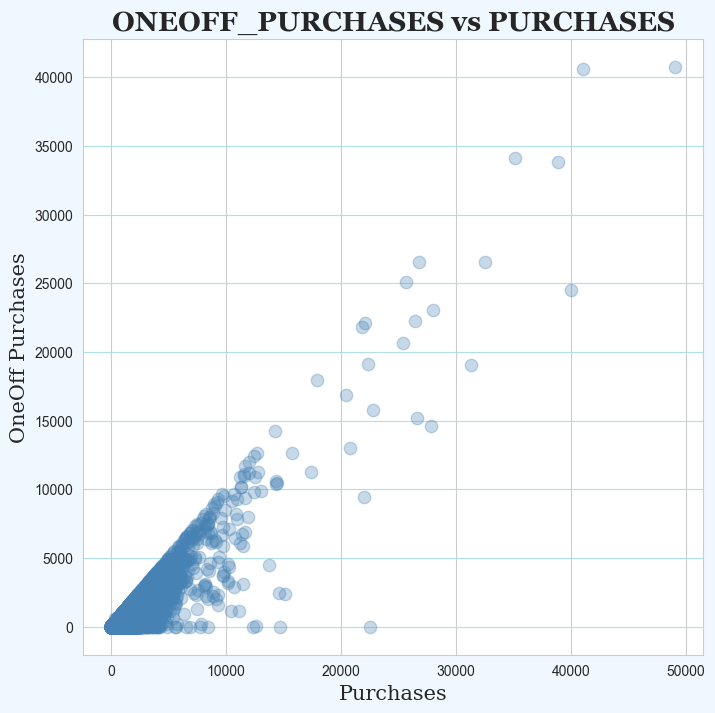

In [63]:
# Setting layout of the plot
plt.figure(figsize = (8, 8)).patch.set_facecolor('aliceblue')
plt.gca().grid(visible = True, color = 'powderblue', zorder = 1, axis = 'y')
plt.title('ONEOFF_PURCHASES vs PURCHASES', fontdict = {'family': 'georgia', 'weight': 'bold', 'size': 20})
plt.xlabel('Purchases', fontdict = {'family': 'serif', 'size': 15})
plt.ylabel('OneOff Purchases', fontdict = {'family': 'serif', 'size': 15})

# Plotting scatter plot
plt.scatter(df['PURCHASES'], df['ONEOFF_PURCHASES'], c = 'steelblue', zorder = 3, s = 80, alpha = 0.3)

# Showing the plot
plt.show()

### 2.3 INSTALLMENT_PURCHASES vs PURCHASES

The scatter plot between 'INSTALLMENTS_PURCHASES' and 'PURCHASES' are also highly correlated, therefore there is a strong evidence that the 'PURCHASES' feature is the sum of 'ONEOFF_PURCHASES' and 'INSTALLMENTS_PURCHASES' features. Hence, the 'PURCHASES' feature can later be dropped from the dataset.

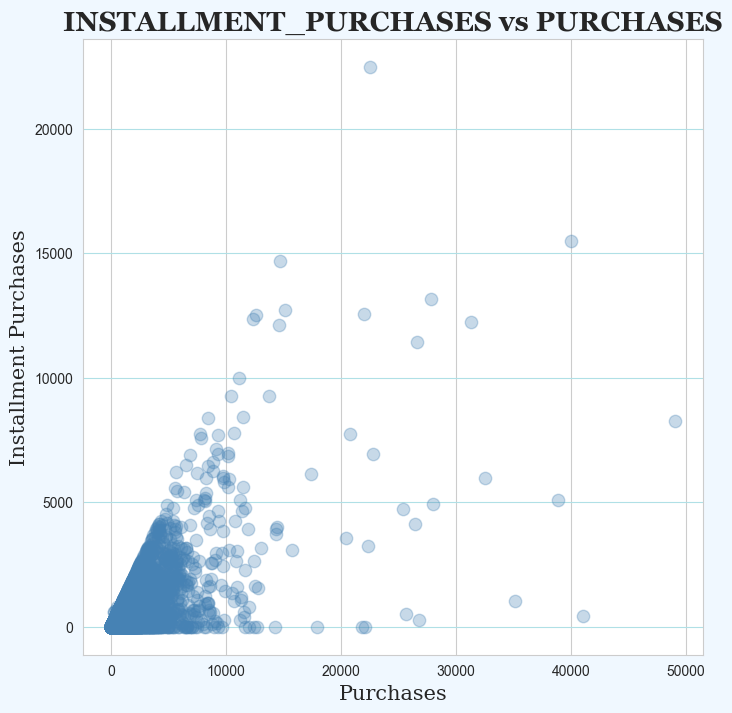

In [64]:
# Setting layout of the plot
plt.figure(figsize = (8, 8)).patch.set_facecolor('aliceblue')
plt.gca().grid(visible = True, color = 'powderblue', zorder = 1, axis = 'y')
plt.title('INSTALLMENT_PURCHASES vs PURCHASES', fontdict = {'family': 'georgia', 'weight': 'bold', 'size': 20})
plt.xlabel('Purchases', fontdict = {'family': 'serif', 'size': 15})
plt.ylabel('Installment Purchases', fontdict = {'family': 'serif', 'size': 15})

# Plotting scatter plot
plt.scatter(df['PURCHASES'], df['INSTALLMENTS_PURCHASES'], c = 'steelblue', zorder = 3, s = 80, alpha = 0.3)

# Showing the plot
plt.show()

### 2.4 CASH_ADVANCE vs BALANCE

The scatter plot between 'CASH_ADVANCE' and 'BALANCE' shows a considerable correlation between these two features, although not obvious in the plot, but this is supported by the correlation matrix. 

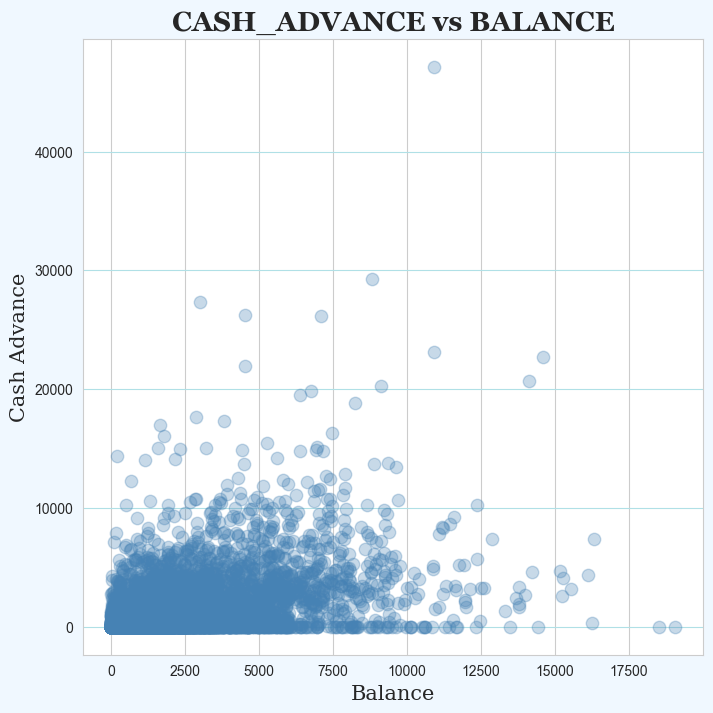

In [65]:
# Setting the layout of the plot
plt.figure(figsize = (8, 8)).patch.set_facecolor('aliceblue')
plt.gca().grid(visible = True, color = 'powderblue', zorder = 1, axis = 'y')
plt.title('CASH_ADVANCE vs BALANCE', fontdict = {'family': 'georgia', 'weight': 'bold', 'size': 20})
plt.xlabel('Balance', fontdict = {'family': 'serif', 'size': 15})
plt.ylabel('Cash Advance', fontdict = {'family': 'serif', 'size': 15})

# Plotting scatter plot
plt.scatter(df['BALANCE'], df['CASH_ADVANCE'], c = 'steelblue', zorder = 3, s = 80, alpha = 0.3)

# Showing the plot
plt.show()

### 2.5 CREDIT_LIMIT vs BALANCE

The scatter plot between 'CREDIT_LIMIT' and 'BALANCE' also shows a considerable correlation between these two features, their impact on the clustering results will be paid more attention to later in the clustering section.

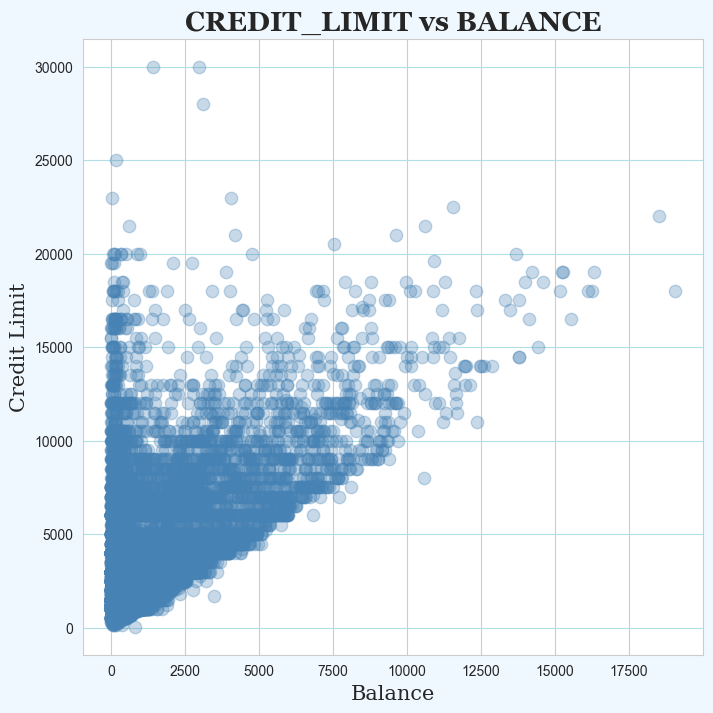

In [66]:
# Setting layout of the plot
plt.figure(figsize = (8, 8)).patch.set_facecolor('aliceblue')
plt.gca().grid(visible=True, color='powderblue', zorder=1, axis='y')
plt.title('CREDIT_LIMIT vs BALANCE', fontdict = {'family': 'georgia', 'weight': 'bold', 'size': 20})
plt.xlabel('Balance', fontdict = {'family': 'serif', 'size': 15})
plt.ylabel('Credit Limit', fontdict = {'family': 'serif', 'size': 15})

# Plotting scatter plot
plt.scatter(df['BALANCE'], df['KNN_IMPUTED_CREDIT_LIMIT'], c = 'steelblue', zorder = 3, s = 80, alpha = 0.3)

# Showing the plot
plt.show()

### 2.6 PURCHASES_INSTALLMENTS_FREQUENCY vs PURCHASES_FREQUENCY

The scatter plot between 'PURCHASES_INSTALLMENTS_FREQUENCY' and 'PURCHASES_FREQUENCY' shows a weird relationship between these two features, their impact on the clustering results will also be paid more attention to later in the clustering section.

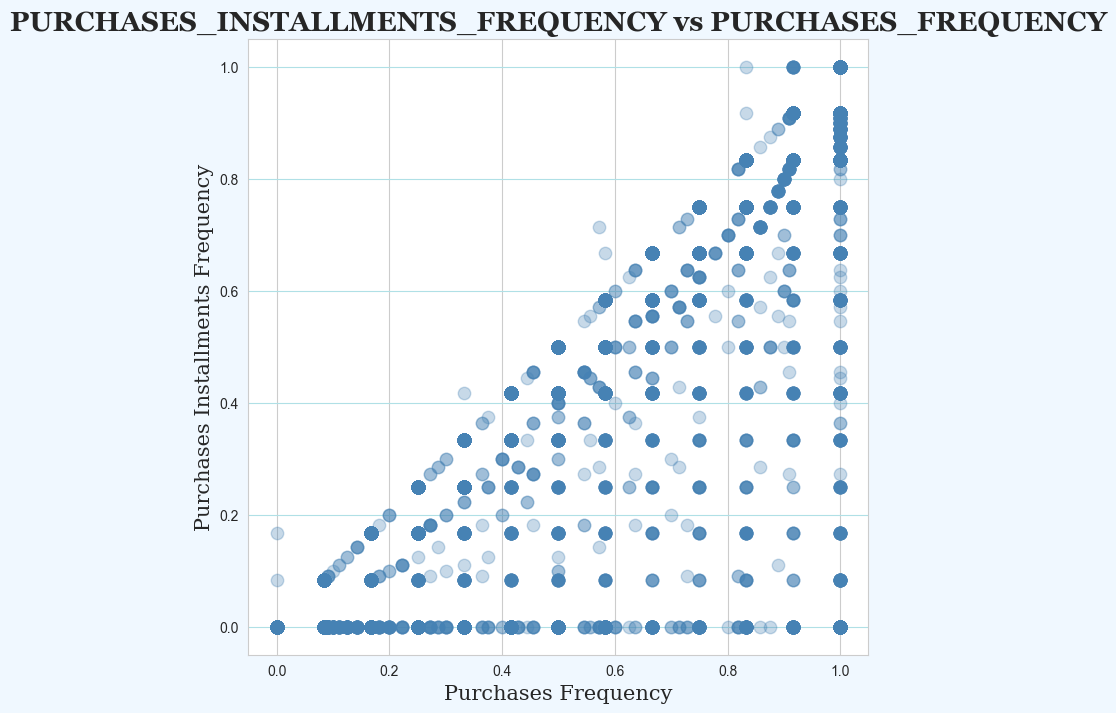

In [67]:
# Setting layout of the plot
plt.figure(figsize = (8, 8)).patch.set_facecolor('aliceblue')
plt.gca().grid(visible=True, color='powderblue', zorder=1, axis='y')
plt.title('PURCHASES_INSTALLMENTS_FREQUENCY vs PURCHASES_FREQUENCY', fontdict = {'family': 'georgia', 'weight': 'bold', 'size': 20})
plt.xlabel('Purchases Frequency', fontdict = {'family': 'serif', 'size': 15})
plt.ylabel('Purchases Installments Frequency', fontdict = {'family': 'serif', 'size': 15})

# Plotting scatter plot
plt.scatter(df['PURCHASES_FREQUENCY'], df['PURCHASES_INSTALLMENTS_FREQUENCY'], c = 'steelblue', zorder = 3, s = 80, alpha = 0.3)

# Showing the plot
plt.show()

## 3.0 Multivariate EDA

### 3.1 t-Distributed Stochastic Neighbor Embedding (t-SNE)

This is a statistical technique for visualizing high-dimensional data by giving each datapoint a location in a two or three-dimensional map. It is a nonlinear dimensionality reduction technique as opposed to Principal Component Analysis (PCA), that is particularly well-suited for embedding high-dimensional data into a space of two or three dimensions, which can then be visualized in a scatter plot.

First, the pairwise similarities between all the data points in their original dimension. The pairwise similarity  $p_{ij}$  between data points $x_i$ and $x_j$ is actually the conditional probability that $x_i$ would pick $x_j$ as its neighbor if neighbors were picked in proportion to their probability density under a Gaussian centered at $x_i$. The points that are far apart have a lower probability of being picked than the points that are close together. The mathematical equation is shown as follows:
 
\begin{align*}
p_{ij} = \frac{exp(-\|x_i - x_j\|^2 / 2\sigma_i^2)}{\sum_{k \neq i} exp(-\|x_i - x_k\|^2 / 2\sigma_i^2)}
\end{align*}

Second, the data points are randomly placed in the lower-dimensional space. The algorithm then computes the pairwise similarities between all the data points in the lower-dimensional space using a t-distribution with one degree of freedom. The similarity  $q_{ij}$  between two points $y_i$ and $y_j$ in the lower-dimensional space is given by: 

\begin{align*}
q_{ij} = \frac{(1 + \|y_i - y_j\|^2)^{-1}}{\sum_{k \neq i} (1 + \|y_i - y_k\|^2)^{-1}}
\end{align*}

Lastly, the algorithm tries to minimize the difference between the pairwise-distance matrix of the original high-dimensional data and the lower-dimensional representation. The algorithm normally uses gradient descent to adjust the position of data points in the lower dimension iteratively until the pairwise-distance matrix in the lower dimension is close enough to that in the original dimension.

Reference: https://medium.com/@sachinsoni600517/mastering-t-sne-t-distributed-stochastic-neighbor-embedding-0e365ee898ea#:~:text=t%2DSNE%2C%20or%20t%2D,typically%20two%20or%20three%20dimensions

In [68]:
# Defining standard scaler for numerical columns
scaler = StandardScaler()

# Scaling numerical columns
df_scaled = scaler.fit_transform(df[numerical_cols])

# Perform t-SNE with 2 components
# Random state is set to 42 for reproducibility
tsne = TSNE(n_components = 2, random_state = 42)
tsne_results = tsne.fit_transform(df_scaled)

# Create a DataFrame with t-SNE results
df_tsne = pd.DataFrame(tsne_results, columns = ['TSNE1', 'TSNE2'])

The output of t-SNE is visualised using a KDE plot. Darker regions refer to higher density of data points, which may signify the presence of clusters in the data.

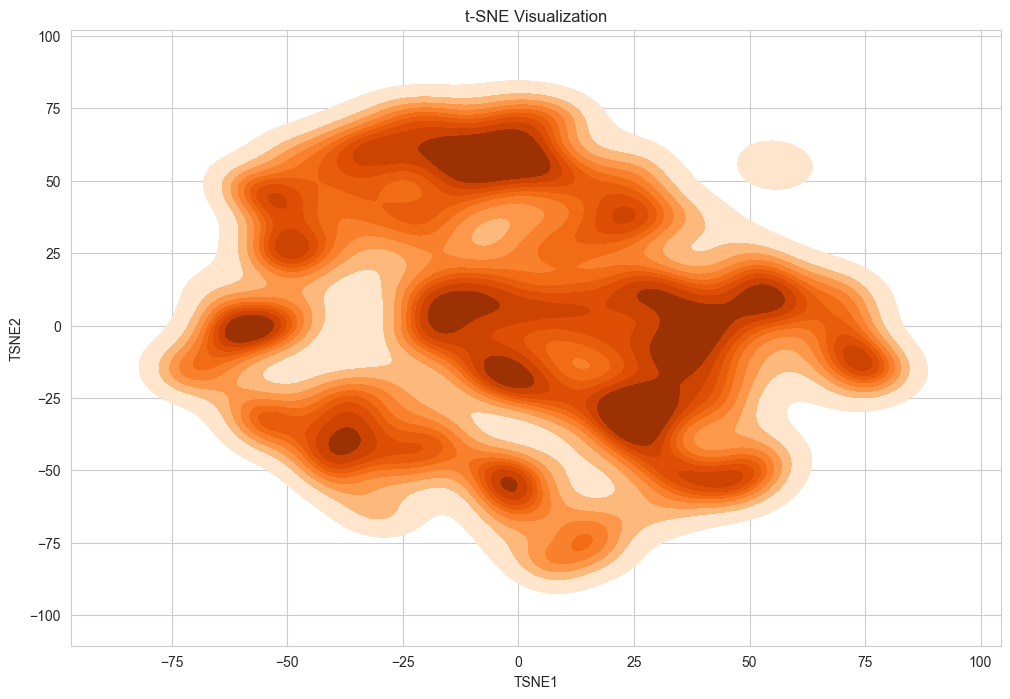

In [69]:
# Setting layout of the plot
plt.figure(figsize = (12, 8))
plt.title('t-SNE Visualization')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')

# Plotting t-SNE using kdeplot
sns.kdeplot(x = df_tsne['TSNE1'], y = df_tsne['TSNE2'], cmap = sns.color_palette('Oranges', as_cmap = True), fill = True, bw_adjust = 0.8) # Setting binwidth for better visualisation

# Showing the plot
plt.show()

# Others

We suspect that the 'PURCHASES' feature is derived from the 'ONEOFF_PURCHASES' and 'INSTALLMENTS_PURCHASES' features, hence we will evaluate the correlation between these features.

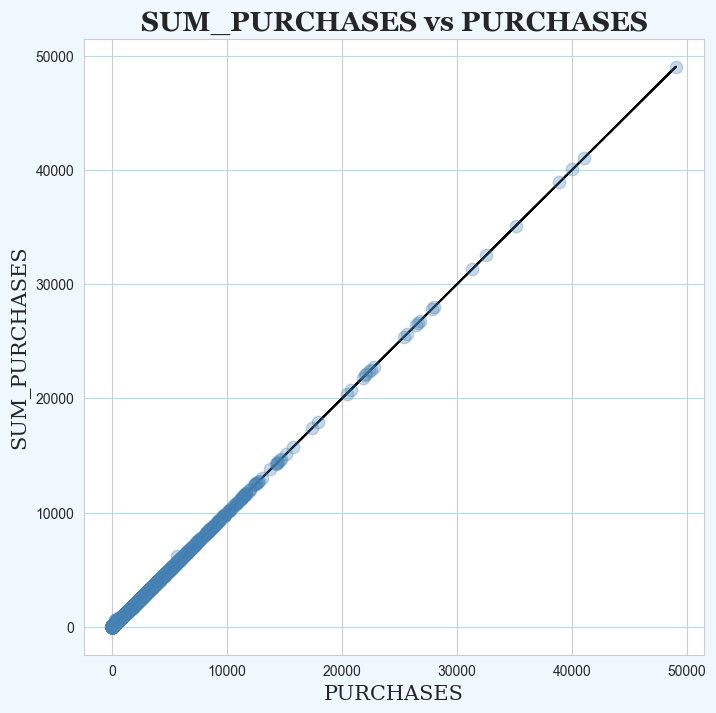

In [18]:
# Summing up 'ONEOFF_PURCHASES' and 'INSTALLMENTS_PURCHASES' features
df['SUM_PURCHASES'] = df['ONEOFF_PURCHASES'] + df['INSTALLMENTS_PURCHASES']

# Getting correlation matrix
corr_matrix = df[['PURCHASES', 'SUM_PURCHASES']].corr()

# Plotting the scatter plot
plt.figure(figsize = (8, 8)).patch.set_facecolor('aliceblue')
plt.gca().grid(visible=True, color='powderblue', zorder=1, axis='y')
plt.title('SUM_PURCHASES vs PURCHASES', fontdict = {'family': 'georgia', 'weight': 'bold', 'size': 20})
plt.xlabel('PURCHASES', fontdict = {'family': 'serif', 'size': 15})
plt.ylabel('SUM_PURCHASES', fontdict = {'family': 'serif', 'size': 15})
plt.scatter(df['PURCHASES'], df['SUM_PURCHASES'], c = 'steelblue', zorder = 3, s = 80, alpha = 0.3)
plt.plot(df['PURCHASES'], df['PURCHASES'], color='black')
plt.show()


**Conclusion:**
It has proven that 'PURCHASES' column is derived from 'ONEOFF_PURCHASES' and 'INSTALLMENTS_PURCHASES' columns, hence 'PURCHASES' column can be dropped from the dataset.

We also suspect that the same behaviour also found in 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENTS_FREQUENCY' columns, hence we will evaluate the correlation between these features.

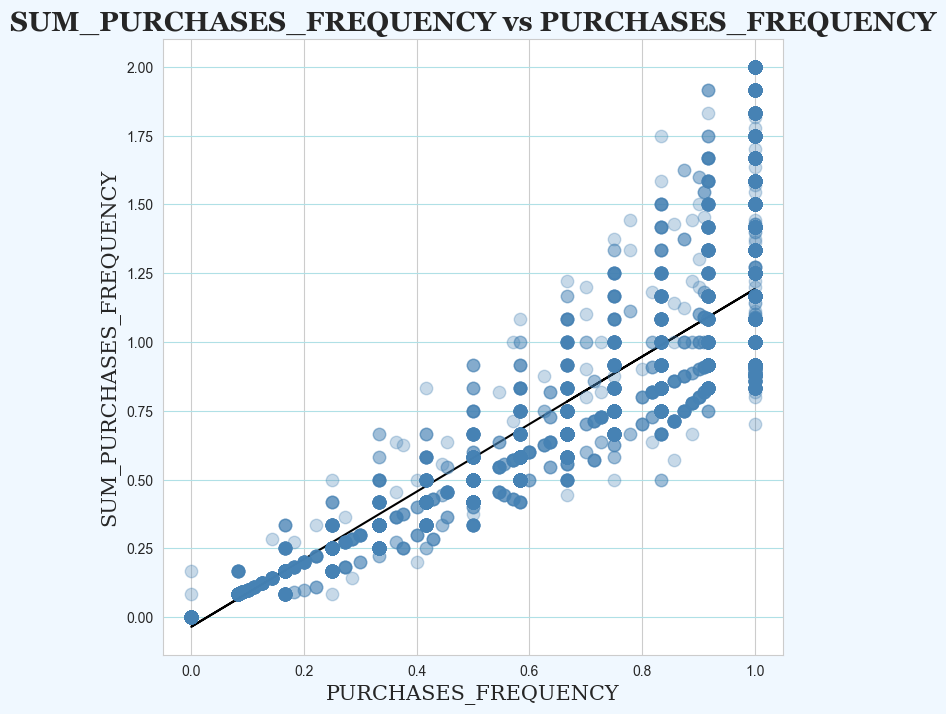

In [21]:
# Summing up 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENTS_FREQUENCY' features
df['SUM_PURCHASES_FREQUENCY'] = df['ONEOFF_PURCHASES_FREQUENCY'] + df['PURCHASES_INSTALLMENTS_FREQUENCY']

# Getting correlation matrix
corr_matrix = df[['PURCHASES_FREQUENCY', 'SUM_PURCHASES_FREQUENCY']].corr()

# Plotting the scatter plot
plt.figure(figsize = (8, 8)).patch.set_facecolor('aliceblue')
plt.gca().grid(visible=True, color='powderblue', zorder=1, axis='y')
plt.title('SUM_PURCHASES_FREQUENCY vs PURCHASES_FREQUENCY', fontdict = {'family': 'georgia', 'weight': 'bold', 'size': 20})
plt.xlabel('PURCHASES_FREQUENCY', fontdict = {'family': 'serif', 'size': 15})
plt.ylabel('SUM_PURCHASES_FREQUENCY', fontdict = {'family': 'serif', 'size': 15})
plt.scatter(df['PURCHASES_FREQUENCY'], df['SUM_PURCHASES_FREQUENCY'], c = 'steelblue', zorder = 3, s = 80, alpha = 0.3)
m, b = np.polyfit(df['PURCHASES_FREQUENCY'], df['SUM_PURCHASES_FREQUENCY'], 1)
plt.plot(df['PURCHASES_FREQUENCY'], m*df['PURCHASES_FREQUENCY'] + b, color='black')
plt.show()

**Conclusion:**
It has proven that 'PURCHASES_FREQUENCY' column is derived from 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENTS_FREQUENCY' columns, hence 'PURCHASES_FREQUENCY' column can be dropped from the dataset.